In [124]:
import pandas as pd
import numpy as np
import requests
from fancyimpute import MICE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# read in data dictionary
ref = pd.read_csv('./college_data_variables.csv')
ref['VARIABLE NAME'].unique()

array(['PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10',
       'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16',
       'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26',
       'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39',
       'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45',
       'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51',
       'PCIP52', 'PCIP54', 'CIP01BACHL', 'CIP03BACHL', 'CIP04BACHL',
       'CIP05BACHL', 'CIP09BACHL', 'CIP10BACHL', 'CIP11BACHL',
       'CIP12BACHL', 'CIP13BACHL', 'CIP14BACHL', 'CIP15BACHL',
       'CIP16BACHL', 'CIP19BACHL', 'CIP22BACHL', 'CIP23BACHL',
       'CIP24BACHL', 'CIP25BACHL', 'CIP26BACHL', 'CIP27BACHL',
       'CIP29BACHL', 'CIP30BACHL', 'CIP31BACHL', 'CIP38BACHL',
       'CIP39BACHL', 'CIP40BACHL', 'CIP41BACHL', 'CIP42BACHL',
       'CIP43BACHL', 'CIP44BACHL', 'CIP45BACHL', 'CIP46BACHL',
       'CIP47BACHL', 'CIP48BACHL', 'CIP49BACHL', 'CIP50BACHL',
       'CIP51BACHL', 'CIP

In [3]:
# list of variables we want
cols = ['PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10',
       'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16',
       'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26',
       'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39',
       'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45',
       'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51',
       'PCIP52', 'PCIP54', 'CIP01BACHL', 'CIP03BACHL', 'CIP04BACHL',
       'CIP05BACHL', 'CIP09BACHL', 'CIP10BACHL', 'CIP11BACHL',
       'CIP12BACHL', 'CIP13BACHL', 'CIP14BACHL', 'CIP15BACHL',
       'CIP16BACHL', 'CIP19BACHL', 'CIP22BACHL', 'CIP23BACHL',
       'CIP24BACHL', 'CIP25BACHL', 'CIP26BACHL', 'CIP27BACHL',
       'CIP29BACHL', 'CIP30BACHL', 'CIP31BACHL', 'CIP38BACHL',
       'CIP39BACHL', 'CIP40BACHL', 'CIP41BACHL', 'CIP42BACHL',
       'CIP43BACHL', 'CIP44BACHL', 'CIP45BACHL', 'CIP46BACHL',
       'CIP47BACHL', 'CIP48BACHL', 'CIP49BACHL', 'CIP50BACHL',
       'CIP51BACHL', 'CIP52BACHL', 'CIP54BACHL', 'ADM_RATE', 'SATVRMID',
       'SATMTMID', 'SATWRMID', 'ACTCMMID', 'ACTENMID', 'ACTMTMID',
       'ACTWRMID', 'PCTFLOAN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN',
       'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN', 'C150_4',
       'TRANS_4', 'COSTT4_A', 'COSTT4_P', 'TUITIONFEE_IN',
       'TUITIONFEE_OUT', 'MD_EARN_WNE_P6', 'CONTROL', 'REGION', 'LOCALE',
       'LOCALE2', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC', 'UG',
       'UG25ABV', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS',
       'AGE_ENTRY', 'FEMALE', 'D_PCTPELL_PCTFLOAN']

In [4]:
# read in large data sets
big = pd.read_csv('/Users/yoni/documents/GA_prod/project-5/CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv')
big2 = pd.read_csv('/Users/yoni/documents/GA_prod/project-5/CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv')
big3 = pd.read_csv('/Users/yoni/documents/GA_prod/project-5/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv')
big4 = pd.read_csv('/Users/yoni/documents/GA_prod/project-5/CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv')
big5 = pd.read_csv('/Users/yoni/documents/GA_prod/project-5/CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6,1169,1170,1171,1172,1173,1174,1175,1177,1178,1179,1183,1184,1185,1186,1187,1188,1196,1199,1200,1201,1209,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,1237,1238,1239,1240,1248,1250,1251,1252,1253,1255,1257,1261,1263,1264,1265,1266,1268,1270,1274,1275,1276,1277,1278,1279,1283,1287,1288,1289,1290,1291,1292,1296,1303,1316,1326,1327,1328,1329,1330,1331,1335,1339,1340,1341,1342,1343,1344,1348,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1426,1427,1475,1476,1479,1480,1483,1484,1487,1488,1489,1490,1491,1492,14

In [5]:
def reduce(all_dfs, cols):
    finished_dfs = []
    for df in all_dfs:
        # mask to selected variables
        df = df[cols]
        # drop all nan rows where % grad is nan
        df.dropna(subset=['C150_4'], inplace=True)
        # drop columns where all values are nan
        df.dropna(how='all', axis=1, inplace = True)
        # drop columns where more than 5% of values are nan
        df.dropna(thresh=len(df)-len(df)/20, axis=1)
        finished_dfs.append(df)
        
    return finished_dfs[0], finished_dfs[1], finished_dfs[2], finished_dfs[3], finished_dfs[4]

In [6]:
# reduce all big dfs
all_dfs = [big, big2, big3, big4, big5]
d1, d2, d3, d4, d5 = reduce(all_dfs, cols)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
def degree_less(df_list):
    # list of subcategories for degree offerings
    sci = ['PCIP01', 'PCIP03', 'PCIP26', 'PCIP27', 'PCIP11', 'PCIP40', 'PCIP41', 'PCIP19', 'PCIP25']
    sci1 = ['CIP01BACHL', 'CIP03BACHL', 'CIP26BACHL', 'CIP27BACHL', 'CIP40BACHL', 'CIP41BACHL', 'CIP19BACHL', 'CIP30BACHL', 'CIP11BACHL']
    soc = ['PCIP52', 'PCIP13', 'PCIP42', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP16', 'PCIP23', 'PCIP24', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP44', 'PCIP45', 'PCIP50', 'PCIP51', 'PCIP54']
    soc1 = ['CIP05BACHL', 'CIP09BACHL', 'CIP10BACHL', 'CIP13BACHL', 'CIP16BACHL', 'CIP23BACHL', 'CIP24BACHL', 'CIP25BACHL', 'CIP31BACHL', 'CIP38BACHL', 'CIP39BACHL', 'CIP42BACHL', 'CIP44BACHL', 'CIP45BACHL', 'CIP50BACHL', 'CIP51BACHL', 'CIP52BACHL', 'CIP54BACHL']
    tec = ['PCIP04', 'PCIP14', 'PCIP15', 'PCIP22', 'PCIP12', 'PCIP29', 'PCIP43', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49']
    tec1 = ['CIP04BACHL','CIP12BACHL', 'CIP14BACHL', 'CIP15BACHL', 'CIP22BACHL', 'CIP29BACHL','CIP43BACHL', 'CIP46BACHL', 'CIP47BACHL', 'CIP48BACHL', 'CIP49BACHL']
    finished_dfs = []
    for n, df in enumerate(df_list):
        # add sum columns
        df[f'percent_science{n}'] = df[sci].sum(axis=1)
        df[f'percent_social{n}'] = df[soc].sum(axis=1)
        df[f'percent_technical{n}'] = df[tec].sum(axis=1)
        df[f'science_disciplines{n}'] = df[sci1].sum(axis=1)
        df[f'social_disciplines{n}'] = df[soc1].sum(axis=1)
        df[f'technical_disciplines{n}'] = df[tec1].sum(axis=1)
        # drop indiviudal degree columns
        df.drop(sci, axis=1, inplace=True)
        df.drop(sci1, axis=1, inplace=True)
        df.drop(soc, axis=1, inplace=True)
        df.drop(soc1, axis=1, inplace=True)
        df.drop(tec, axis=1, inplace=True)
        df.drop(tec1, axis=1, inplace=True)
        
        finished_dfs.append(df)
        
    return finished_dfs[0], finished_dfs[1], finished_dfs[2], finished_dfs[3], finished_dfs[4]

In [8]:
# update all dfs with feature engineering
df_list = [d1, d2, d3, d4, d5]
df1, df2, df3, df4, df5 = degree_less(df_list)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [9]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(2489, 40)
(2481, 38)
(2448, 40)
(2423, 39)
(2370, 40)


### THIS IS THE NEW CODE FOR TO TURN STUFF INTO NUMERIC

**df1**

In [10]:
# What columns in df1 need to be changed into numbers?
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 7145
Data columns (total 40 columns):
ADM_RATE                  1812 non-null float64
SATVRMID                  1167 non-null float64
SATMTMID                  1176 non-null float64
SATWRMID                  718 non-null float64
ACTCMMID                  1206 non-null float64
ACTENMID                  1070 non-null float64
ACTMTMID                  1071 non-null float64
ACTWRMID                  316 non-null float64
PCTFLOAN                  2488 non-null float64
GRAD_DEBT_MDN             2487 non-null object
WDRAW_DEBT_MDN            2487 non-null object
LO_INC_DEBT_MDN           2487 non-null object
MD_INC_DEBT_MDN           2487 non-null object
HI_INC_DEBT_MDN           2487 non-null object
C150_4                    2489 non-null float64
TRANS_4                   2489 non-null float64
COSTT4_A                  2367 non-null float64
COSTT4_P                  29 non-null float64
TUITIONFEE_IN             2414 non-nul

In [11]:
# Turn all 'PrivacySuppressed' into np.nan and make everyting into floats
df1['GRAD_DEBT_MDN'] = df1['GRAD_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df1['WDRAW_DEBT_MDN'] = df1['WDRAW_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df1['LO_INC_DEBT_MDN'] = df1['LO_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df1['MD_INC_DEBT_MDN'] = df1['MD_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df1['HI_INC_DEBT_MDN'] = df1['HI_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

df1['PAR_ED_PCT_MS'] = df1['PAR_ED_PCT_MS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df1['PAR_ED_PCT_HS'] = df1['PAR_ED_PCT_HS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df1['PAR_ED_PCT_PS'] = df1['PAR_ED_PCT_PS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df1['AGE_ENTRY'] = df1['AGE_ENTRY'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df1['FEMALE'] = df1['FEMALE'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [12]:
# Check that all columns in df1 are numeric
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 7145
Data columns (total 40 columns):
ADM_RATE                  1812 non-null float64
SATVRMID                  1167 non-null float64
SATMTMID                  1176 non-null float64
SATWRMID                  718 non-null float64
ACTCMMID                  1206 non-null float64
ACTENMID                  1070 non-null float64
ACTMTMID                  1071 non-null float64
ACTWRMID                  316 non-null float64
PCTFLOAN                  2488 non-null float64
GRAD_DEBT_MDN             2321 non-null float64
WDRAW_DEBT_MDN            2320 non-null float64
LO_INC_DEBT_MDN           2320 non-null float64
MD_INC_DEBT_MDN           2240 non-null float64
HI_INC_DEBT_MDN           2243 non-null float64
C150_4                    2489 non-null float64
TRANS_4                   2489 non-null float64
COSTT4_A                  2367 non-null float64
COSTT4_P                  29 non-null float64
TUITIONFEE_IN             2414 no

**df2**

In [13]:
# What columns in df2 need to be changed into numbers?
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 7270
Data columns (total 38 columns):
ADM_RATE                  1806 non-null float64
SATVRMID                  1169 non-null float64
SATMTMID                  1182 non-null float64
SATWRMID                  719 non-null float64
ACTCMMID                  1228 non-null float64
ACTENMID                  1083 non-null float64
ACTMTMID                  1085 non-null float64
ACTWRMID                  291 non-null float64
PCTFLOAN                  2480 non-null float64
GRAD_DEBT_MDN             2479 non-null object
WDRAW_DEBT_MDN            2479 non-null object
LO_INC_DEBT_MDN           2479 non-null object
MD_INC_DEBT_MDN           2479 non-null object
HI_INC_DEBT_MDN           2479 non-null object
C150_4                    2481 non-null float64
TRANS_4                   2481 non-null float64
COSTT4_A                  2412 non-null float64
COSTT4_P                  24 non-null float64
TUITIONFEE_IN             2442 non-nul

In [14]:
# Turn all 'PrivacySuppressed' into np.nan and make everyting into floats
df2['GRAD_DEBT_MDN'] = df2['GRAD_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df2['WDRAW_DEBT_MDN'] = df2['WDRAW_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df2['LO_INC_DEBT_MDN'] = df2['LO_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df2['MD_INC_DEBT_MDN'] = df2['MD_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df2['HI_INC_DEBT_MDN'] = df2['HI_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

df2['PAR_ED_PCT_MS'] = df2['PAR_ED_PCT_MS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df2['PAR_ED_PCT_HS'] = df2['PAR_ED_PCT_HS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df2['PAR_ED_PCT_PS'] = df2['PAR_ED_PCT_PS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df2['AGE_ENTRY'] = df2['AGE_ENTRY'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df2['FEMALE'] = df2['FEMALE'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [15]:
# Check that all columns in df2 are numeric
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 7270
Data columns (total 38 columns):
ADM_RATE                  1806 non-null float64
SATVRMID                  1169 non-null float64
SATMTMID                  1182 non-null float64
SATWRMID                  719 non-null float64
ACTCMMID                  1228 non-null float64
ACTENMID                  1083 non-null float64
ACTMTMID                  1085 non-null float64
ACTWRMID                  291 non-null float64
PCTFLOAN                  2480 non-null float64
GRAD_DEBT_MDN             2321 non-null float64
WDRAW_DEBT_MDN            2326 non-null float64
LO_INC_DEBT_MDN           2320 non-null float64
MD_INC_DEBT_MDN           2247 non-null float64
HI_INC_DEBT_MDN           2245 non-null float64
C150_4                    2481 non-null float64
TRANS_4                   2481 non-null float64
COSTT4_A                  2412 non-null float64
COSTT4_P                  24 non-null float64
TUITIONFEE_IN             2442 no

**df3**

In [16]:
# What columns in df3 need to be changed into numbers?
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 0 to 7371
Data columns (total 40 columns):
ADM_RATE                  1797 non-null float64
SATVRMID                  1269 non-null float64
SATMTMID                  1283 non-null float64
SATWRMID                  777 non-null float64
ACTCMMID                  1310 non-null float64
ACTENMID                  1133 non-null float64
ACTMTMID                  1134 non-null float64
ACTWRMID                  290 non-null float64
PCTFLOAN                  2446 non-null float64
GRAD_DEBT_MDN             2445 non-null object
WDRAW_DEBT_MDN            2445 non-null object
LO_INC_DEBT_MDN           2445 non-null object
MD_INC_DEBT_MDN           2445 non-null object
HI_INC_DEBT_MDN           2445 non-null object
C150_4                    2448 non-null float64
TRANS_4                   2448 non-null float64
COSTT4_A                  2388 non-null float64
COSTT4_P                  24 non-null float64
TUITIONFEE_IN             2411 non-nul

In [17]:
# Turn all 'PrivacySuppressed' into np.nan and make everyting into floats
df3['GRAD_DEBT_MDN'] = df3['GRAD_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df3['WDRAW_DEBT_MDN'] = df3['WDRAW_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df3['LO_INC_DEBT_MDN'] = df3['LO_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df3['MD_INC_DEBT_MDN'] = df3['MD_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df3['HI_INC_DEBT_MDN'] = df3['HI_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

df3['MD_EARN_WNE_P6'] = df3['MD_EARN_WNE_P6'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

df3['PAR_ED_PCT_MS'] = df3['PAR_ED_PCT_MS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df3['PAR_ED_PCT_HS'] = df3['PAR_ED_PCT_HS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df3['PAR_ED_PCT_PS'] = df3['PAR_ED_PCT_PS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df3['AGE_ENTRY'] = df3['AGE_ENTRY'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df3['FEMALE'] = df3['FEMALE'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [18]:
# Check that all columns in df3 are numeric
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 0 to 7371
Data columns (total 40 columns):
ADM_RATE                  1797 non-null float64
SATVRMID                  1269 non-null float64
SATMTMID                  1283 non-null float64
SATWRMID                  777 non-null float64
ACTCMMID                  1310 non-null float64
ACTENMID                  1133 non-null float64
ACTMTMID                  1134 non-null float64
ACTWRMID                  290 non-null float64
PCTFLOAN                  2446 non-null float64
GRAD_DEBT_MDN             2283 non-null float64
WDRAW_DEBT_MDN            2288 non-null float64
LO_INC_DEBT_MDN           2285 non-null float64
MD_INC_DEBT_MDN           2214 non-null float64
HI_INC_DEBT_MDN           2214 non-null float64
C150_4                    2448 non-null float64
TRANS_4                   2448 non-null float64
COSTT4_A                  2388 non-null float64
COSTT4_P                  24 non-null float64
TUITIONFEE_IN             2411 no

**df4**

In [19]:
# What columns in df4 need to be changed into numbers?
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423 entries, 0 to 7387
Data columns (total 39 columns):
ADM_RATE                  1833 non-null float64
SATVRMID                  1266 non-null float64
SATMTMID                  1280 non-null float64
SATWRMID                  762 non-null float64
ACTCMMID                  1294 non-null float64
ACTENMID                  1110 non-null float64
ACTMTMID                  1109 non-null float64
ACTWRMID                  261 non-null float64
PCTFLOAN                  2420 non-null float64
GRAD_DEBT_MDN             2420 non-null object
WDRAW_DEBT_MDN            2420 non-null object
LO_INC_DEBT_MDN           2420 non-null object
MD_INC_DEBT_MDN           2420 non-null object
HI_INC_DEBT_MDN           2420 non-null object
C150_4                    2423 non-null float64
TRANS_4                   2423 non-null float64
COSTT4_A                  2376 non-null float64
COSTT4_P                  21 non-null float64
TUITIONFEE_IN             2376 non-nul

In [20]:
# Turn all 'PrivacySuppressed' into np.nan and make everyting into floats
df4['GRAD_DEBT_MDN'] = df4['GRAD_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df4['WDRAW_DEBT_MDN'] = df4['WDRAW_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df4['LO_INC_DEBT_MDN'] = df4['LO_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df4['MD_INC_DEBT_MDN'] = df4['MD_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df4['HI_INC_DEBT_MDN'] = df4['HI_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

df4['MD_EARN_WNE_P6'] = df4['MD_EARN_WNE_P6'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

df4['PAR_ED_PCT_MS'] = df4['PAR_ED_PCT_MS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df4['PAR_ED_PCT_HS'] = df4['PAR_ED_PCT_HS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df4['PAR_ED_PCT_PS'] = df4['PAR_ED_PCT_PS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df4['AGE_ENTRY'] = df4['AGE_ENTRY'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df4['FEMALE'] = df4['FEMALE'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [21]:
# Check that all columns in df4 are numeric
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423 entries, 0 to 7387
Data columns (total 39 columns):
ADM_RATE                  1833 non-null float64
SATVRMID                  1266 non-null float64
SATMTMID                  1280 non-null float64
SATWRMID                  762 non-null float64
ACTCMMID                  1294 non-null float64
ACTENMID                  1110 non-null float64
ACTMTMID                  1109 non-null float64
ACTWRMID                  261 non-null float64
PCTFLOAN                  2420 non-null float64
GRAD_DEBT_MDN             2252 non-null float64
WDRAW_DEBT_MDN            2261 non-null float64
LO_INC_DEBT_MDN           2259 non-null float64
MD_INC_DEBT_MDN           2197 non-null float64
HI_INC_DEBT_MDN           2194 non-null float64
C150_4                    2423 non-null float64
TRANS_4                   2423 non-null float64
COSTT4_A                  2376 non-null float64
COSTT4_P                  21 non-null float64
TUITIONFEE_IN             2376 no

**df5**

In [22]:
# What columns in df5 need to be changed into numbers?
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 7369
Data columns (total 40 columns):
ADM_RATE                  1815 non-null float64
SATVRMID                  1230 non-null float64
SATMTMID                  1253 non-null float64
SATWRMID                  731 non-null float64
ACTCMMID                  1286 non-null float64
ACTENMID                  1091 non-null float64
ACTMTMID                  1090 non-null float64
ACTWRMID                  254 non-null float64
PCTFLOAN                  2366 non-null float64
GRAD_DEBT_MDN             2347 non-null object
WDRAW_DEBT_MDN            2347 non-null object
LO_INC_DEBT_MDN           2347 non-null object
MD_INC_DEBT_MDN           2347 non-null object
HI_INC_DEBT_MDN           2347 non-null object
C150_4                    2370 non-null float64
TRANS_4                   2370 non-null float64
COSTT4_A                  2332 non-null float64
COSTT4_P                  15 non-null float64
TUITIONFEE_IN             2335 non-nul

In [23]:
# Turn all 'PrivacySuppressed' into np.nan and make everyting into floats
df5['GRAD_DEBT_MDN'] = df5['GRAD_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df5['WDRAW_DEBT_MDN'] = df5['WDRAW_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df5['LO_INC_DEBT_MDN'] = df5['LO_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df5['MD_INC_DEBT_MDN'] = df5['MD_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df5['HI_INC_DEBT_MDN'] = df5['HI_INC_DEBT_MDN'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

df5['MD_EARN_WNE_P6'] = df5['MD_EARN_WNE_P6'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

df5['PAR_ED_PCT_MS'] = df5['PAR_ED_PCT_MS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df5['PAR_ED_PCT_HS'] = df5['PAR_ED_PCT_HS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df5['PAR_ED_PCT_PS'] = df5['PAR_ED_PCT_PS'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df5['AGE_ENTRY'] = df5['AGE_ENTRY'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))
df5['FEMALE'] = df5['FEMALE'].apply(lambda x : np.nan if x == 'PrivacySuppressed' else float(x))

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [24]:
# Check that all columns in df5 are numeric
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 7369
Data columns (total 40 columns):
ADM_RATE                  1815 non-null float64
SATVRMID                  1230 non-null float64
SATMTMID                  1253 non-null float64
SATWRMID                  731 non-null float64
ACTCMMID                  1286 non-null float64
ACTENMID                  1091 non-null float64
ACTMTMID                  1090 non-null float64
ACTWRMID                  254 non-null float64
PCTFLOAN                  2366 non-null float64
GRAD_DEBT_MDN             2203 non-null float64
WDRAW_DEBT_MDN            2203 non-null float64
LO_INC_DEBT_MDN           2213 non-null float64
MD_INC_DEBT_MDN           2144 non-null float64
HI_INC_DEBT_MDN           2145 non-null float64
C150_4                    2370 non-null float64
TRANS_4                   2370 non-null float64
COSTT4_A                  2332 non-null float64
COSTT4_P                  15 non-null float64
TUITIONFEE_IN             2335 no

In [25]:
# drop columns with more than 10% nans
df1.dropna(thresh=len(df1)-len(df1)/10, axis=1, inplace=True)
df2.dropna(thresh=len(df2)-len(df2)/10, axis=1, inplace=True)
df3.dropna(thresh=len(df3)-len(df3)/10, axis=1, inplace=True)
df4.dropna(thresh=len(df4)-len(df4)/10, axis=1, inplace=True)
df5.dropna(thresh=len(df5)-len(df5)/10, axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value 

In [26]:
# imputing function, takes a list of 5 dfs as argument
def mice_impute(list_of_dfs):
    finished_dfs = []
    for df in list_of_dfs:
        mice = MICE(verbose=False)
        df = pd.DataFrame(mice.complete(df), columns=df.columns)
        finished_dfs.append(df)
        
    return finished_dfs[0], finished_dfs[1], finished_dfs[2], finished_dfs[3], finished_dfs[4]

In [27]:
# impute values
list_of_dfs = [df1, df2, df3, df4, df5]
df1, df2, df3, df4, df5 = mice_impute(list_of_dfs)

In [28]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(2489, 28)
(2481, 27)
(2448, 29)
(2423, 28)
(2370, 29)


In [29]:
one = set(df1.columns.values)
two = set(df2.columns.values)
tree = set(df3.columns.values)
four = set(df4.columns.values)
five = set(df5.columns.values)

# columns that are the same in all 5 data frames
one & two & tree & four & five

{'AGE_ENTRY',
 'AVGFACSAL',
 'C150_4',
 'CONTROL',
 'COSTT4_A',
 'D_PCTPELL_PCTFLOAN',
 'FEMALE',
 'GRAD_DEBT_MDN',
 'HI_INC_DEBT_MDN',
 'INEXPFTE',
 'LO_INC_DEBT_MDN',
 'PAR_ED_PCT_PS',
 'PCTFLOAN',
 'PFTFAC',
 'REGION',
 'TRANS_4',
 'TUITFTE',
 'TUITIONFEE_IN',
 'TUITIONFEE_OUT',
 'WDRAW_DEBT_MDN'}

In [30]:
# make lists of columns in each df
one = set(df1.columns.values)
two = set(df2.columns.values)
three = set(df3.columns.values)
four = set(df4.columns.values)
five = set(df5.columns.values)

# make one list of columns that are in all dfs
final_vars = []
for i in one:
    if i in two and i in three and i in four and i in five:
        final_vars.append(i)

# mask all dfs to final_vars list        
df1 = df1[final_vars]
df2 = df2[final_vars]
df3 = df3[final_vars]
df4 = df4[final_vars]
df5 = df5[final_vars]

# concat all dfs
one_big_df = pd.concat([df1, df2, df3, df4, df5], axis=1)

# average values into one df
final_df = pd.DataFrame()
for i in final_vars:
    final_df[i] = one_big_df[i].mean(axis=1)

In [31]:
final_df.head()

,GRAD_DEBT_MDN,INEXPFTE,COSTT4_A,FEMALE,D_PCTPELL_PCTFLOAN,PAR_ED_PCT_PS,LO_INC_DEBT_MDN,TUITIONFEE_IN,PFTFAC,PCTFLOAN,HI_INC_DEBT_MDN,TRANS_4,REGION,CONTROL,TUITIONFEE_OUT,AVGFACSAL,AGE_ENTRY,WDRAW_DEBT_MDN,TUITFTE,C150_4
0,31123.6,7637.8,18697.6,0.523263,4331.2,0.617130,13108.1,7930.8,0.80250,0.80970,14545.000000,0.124920,5.0,1.0,14287.2,6825.2,20.588594,9700.0,7799.0,0.31826
1,20303.5,17284.0,20566.2,0.627327,11333.6,0.652870,13028.0,7108.8,0.91182,0.53426,12128.300000,0.258461,5.0,1.0,16166.4,9883.6,23.479992,8486.3,8933.0,0.51340
2,21681.9,5390.0,12752.6,0.632368,325.0,0.462482,7352.4,7238.0,0.71230,0.82598,12661.294403,0.080000,5.0,2.0,7238.0,3526.2,33.570714,7248.6,13107.2,0.30778
3,22338.2,9817.8,20234.2,0.486289,5827.2,0.676286,14210.9,8873.2,0.67506,0.46958,12392.800000,0.326892,5.0,1.0,20778.4,9112.4,23.748793,8213.9,8291.4,0.47306
4,31375.9,7686.8,17440.6,0.590720,4983.2,0.608273,11871.1,8434.8,0.64122,0.79664,12723.400000,0.000000,5.0,1.0,15121.2,6861.6,20.662727,9956.7,7656.0,0.26202


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 20 columns):
GRAD_DEBT_MDN         2489 non-null float64
INEXPFTE              2489 non-null float64
COSTT4_A              2489 non-null float64
FEMALE                2489 non-null float64
D_PCTPELL_PCTFLOAN    2489 non-null float64
PAR_ED_PCT_PS         2489 non-null float64
LO_INC_DEBT_MDN       2489 non-null float64
TUITIONFEE_IN         2489 non-null float64
PFTFAC                2489 non-null float64
PCTFLOAN              2489 non-null float64
HI_INC_DEBT_MDN       2489 non-null float64
TRANS_4               2489 non-null float64
REGION                2489 non-null float64
CONTROL               2489 non-null float64
TUITIONFEE_OUT        2489 non-null float64
AVGFACSAL             2489 non-null float64
AGE_ENTRY             2489 non-null float64
WDRAW_DEBT_MDN        2489 non-null float64
TUITFTE               2489 non-null float64
C150_4                2489 non-null float64
dtypes: float

### Random Forest

In [38]:
# Declair X and y
X = final_df.drop(['C150_4'], axis=1)
y = final_df['C150_4']

In [39]:
# train_test_split
indep_train, indep_test, dep_train, dep_test = train_test_split(X, y, test_size = 0.3, random_state=42)

**ALL VARIABLES**

In [40]:
# X and y in training and test
cols = ['LO_INC_DEBT_MDN', 'AVGFACSAL', 'HI_INC_DEBT_MDN', 'TRANS_4', 'INEXPFTE', 'TUITIONFEE_OUT', 'REGION',
             'FEMALE', 'D_PCTPELL_PCTFLOAN', 'AGE_ENTRY', 'PFTFAC', 'PAR_ED_PCT_PS', 'TUITFTE', 'PCTFLOAN',
              'WDRAW_DEBT_MDN', 'TUITIONFEE_IN', 'COSTT4_A', 'CONTROL']

X_train = indep_train[cols]
X_test = indep_test[cols]
y_train = dep_train
y_test = dep_test

In [41]:
# GridSearchCV - best hyperparameter
grid = {'n_estimators': np.arange(1, 10),
        'max_depth': np.arange(1, 10),
        'max_features' : ('auto', 'sqrt', 'log2', None),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=42)
gs = GridSearchCV(rfr, grid)

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 9, 'verbose': 0}


In [44]:
# RF model (best hyperparameter)
rf = RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=9, verbose=0, random_state=42)

In [45]:
# fit
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

**Look at the feature importance (based on all columns used)**
`pd.Series(dict(zip(X_train.columns,rf.feature_importances_))).abs().sort_values(ascending=False).head(20)`

PAR_ED_PCT_PS         
0.190794 

TUITIONFEE_OUT      
0.152227 

COSTT4_A               
0.133741 

INEXPFTE               
0.088357 

AVGFACSAL             
0.072202 

HI_INC_DEBT_MDN       
0.061467

LO_INC_DEBT_MDN        
0.052891 

PFTFAC                 
0.043437 

TUITIONFEE_IN          
0.029650

PCTFLOAN               
0.029102 

D_PCTPELL_PCTFLOAN     
0.028778 

AGE_ENTRY              
0.028578 

TRANS_4              
0.022499 

TUITFTE                
0.018795 

WDRAW_DEBT_MDN         
0.017490

CONTROL                
0.014862

FEMALE                
0.009954

REGION                
0.005177

dtype: float64

In [53]:
# predict
pred = cross_val_predict(rf, X_test, y_test)
pred.mean()

0.479440311887092

In [120]:
# score
scores = cross_val_score(rf, X_test, y_test, cv=4)
scores.mean()

0.6027790994901341

In [118]:
# what is best cv to use (after you run this cell, take best cv-value and re-run cell above)
cv_list = [2,3,4,5,6,7,8,9,10]

for cv in cv_list:
    scores = cross_val_score(rf, X_test, y_test, cv=cv)
    print(scores.mean())

0.5865145967668695
0.5972797506813713
0.6027790994901341
0.5902331926084156
0.5804946606192912
0.6020771261095683
0.5741955100927731
0.5783184822673095
0.5981818292860475


In [55]:
# Get y_pred and y_true for plotting
y_pred = rf.predict(X_test)
y_true = y_test

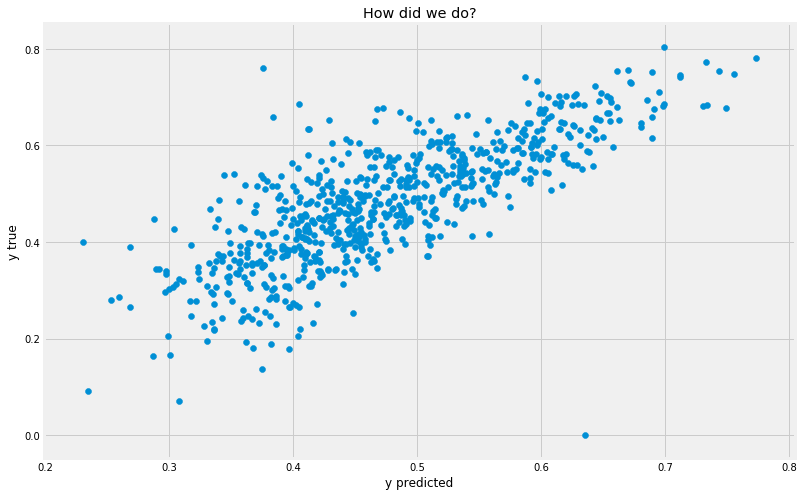

In [63]:
# scatter plot in pyplot
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_true)

plt.xlabel('y predicted')
plt.ylabel('y true')
plt.title('How did we do?')
 
plt.show()

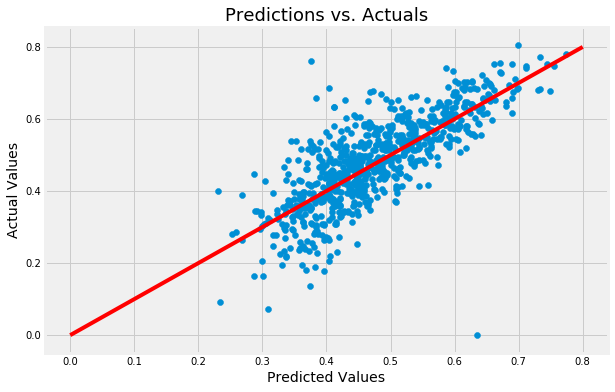

In [134]:
# another scatter plot in pyplot
plt.figure(figsize=(9,6))
plt.scatter(y_pred, y_true)
plt.plot([0,0.8],[0,0.8], c='r')
plt.title('Predictions vs. Actuals', fontsize=18)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14);

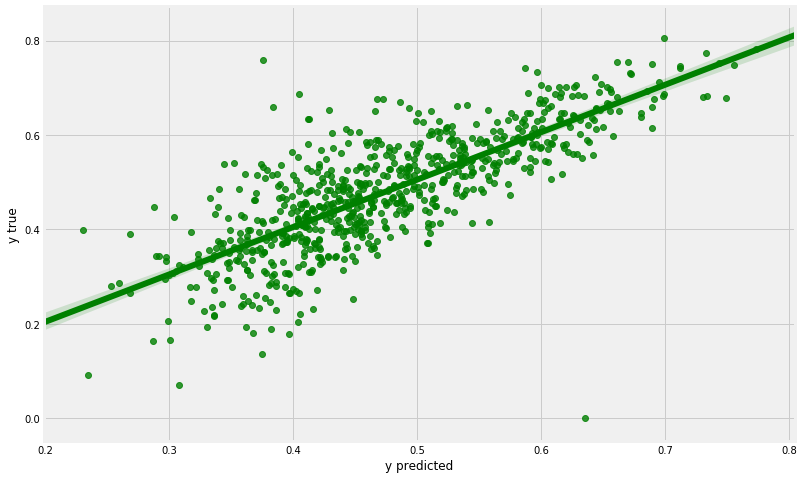

In [72]:
# scatter plot in Seaborn
x, y = pd.Series(y_pred, name="y predicted"), pd.Series(y_true, name="y true")
fig = plt.subplots(figsize=(12,8))
ax = sns.regplot(x=x, y=y, color="g", ci=95)

**Model with 3 most important features**

In [86]:
# X and y in training and test
cols = ['PAR_ED_PCT_PS', 'TUITIONFEE_OUT', 'COSTT4_A']

X_train2 = indep_train[cols]
X_test2 = indep_test[cols]
y_train2 = dep_train
y_test2 = dep_test

In [87]:
# GridSearchCV - best hyperparameter
grid = {'n_estimators': np.arange(1, 10),
        'max_depth': np.arange(1, 10),
        'max_features' : ('auto', 'sqrt', 'log2', None),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=42)
gs = GridSearchCV(rfr2, grid)

gs.fit(X_train2, y_train2)

print(gs.best_params_)

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 9, 'verbose': 0}


In [88]:
# RF model (best hyperparameter)
rf2 = RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=9, verbose=0, random_state=42)

In [89]:
# fit
rf2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [117]:
# score
scores = cross_val_score(rf2, X_test2, y_test2, cv=3)
scores.mean()

0.5621607537619494

In [116]:
# what is best cv to use (after you run this cell, take best cv-value and re-run cell above)
cv_list = [2,3,4,5,6,7,8,9,10]

for cv in cv_list:
    scores = cross_val_score(rf2, X_test2, y_test2, cv=cv)
    print(scores.mean())

0.5455019346532033
0.5621607537619494
0.5492743219912044
0.5547888246547055
0.5510289532952445
0.5543100072007018
0.542175878956447
0.5501817459362216
0.5404117766871641


**Model with 7 most important features (all statistically significant with 95% confidence)**

In [155]:
# X and y in training and test
cols = ['PAR_ED_PCT_PS', 'TUITIONFEE_OUT', 'COSTT4_A', 'INEXPFTE', 'AVGFACSAL', 'HI_INC_DEBT_MDN', 'LO_INC_DEBT_MDN']

X_train4 = indep_train[cols]
X_test4 = indep_test[cols]
y_train4 = dep_train
y_test4 = dep_test

In [156]:
# GridSearchCV - best hyperparameter
grid = {'n_estimators': np.arange(1, 10),
        'max_depth': np.arange(1, 10),
        'max_features' : ('auto', 'sqrt', 'log2', None),
        'verbose' : np.arange(0, 1)}

rfr4 = RandomForestRegressor(random_state=42)
gs = GridSearchCV(rfr4, grid)

gs.fit(X_train4, y_train4)

print(gs.best_params_)

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 8, 'verbose': 0}


In [157]:
# RF model (best hyperparameter)
rf4 = RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=8, verbose=0, random_state=42)

In [158]:
# fit
rf4.fit(X_train4, y_train4)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [161]:
# score
scores = cross_val_score(rf4, X_test4, y_test4, cv=3)
scores.mean()

0.596817925158519

In [160]:
# what is best cv to use (after you run this cell, take best cv-value and re-run cell above)
cv_list = [2,3,4,5,6,7,8,9,10]

for cv in cv_list:
    scores = cross_val_score(rf4, X_test4, y_test4, cv=cv)
    print(scores.mean())

0.5866122177056627
0.596817925158519
0.5818489335102436
0.5848359888394727
0.5676872518109934
0.5888463305652698
0.5690519037551549
0.5898221311674313
0.5740947483421908


**Model with all features - the least important feature**

In [91]:
# X and y in training and test
cols = ['LO_INC_DEBT_MDN', 'AVGFACSAL', 'HI_INC_DEBT_MDN', 'TRANS_4', 'INEXPFTE', 'TUITIONFEE_OUT',
             'FEMALE', 'D_PCTPELL_PCTFLOAN', 'AGE_ENTRY', 'PFTFAC', 'PAR_ED_PCT_PS', 'TUITFTE', 'PCTFLOAN',
              'WDRAW_DEBT_MDN', 'TUITIONFEE_IN', 'COSTT4_A', 'CONTROL']

X_train3 = indep_train[cols]
X_test3 = indep_test[cols]
y_train3 = dep_train
y_test3 = dep_test

In [92]:
# GridSearchCV - best hyperparameter
grid = {'n_estimators': np.arange(1, 10),
        'max_depth': np.arange(1, 10),
        'max_features' : ('auto', 'sqrt', 'log2', None),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=42)
gs = GridSearchCV(rfr3, grid)

gs.fit(X_train3, y_train3)

print(gs.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 9, 'verbose': 0}


In [93]:
# RF model (best hyperparameter)
rf3 = RandomForestRegressor(max_depth=8, max_features='auto', n_estimators=9, verbose=0, random_state=42)

In [94]:
# fit
rf3.fit(X_train3, y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [115]:
# score
scores = cross_val_score(rf3, X_test3, y_test3, cv=7)
scores.mean()

0.5993193665032057

In [114]:
# what is best cv to use (after you run this cell, take best cv-value and re-run cell above)
cv_list = [2,3,4,5,6,7,8,9,10]

for cv in cv_list:
    scores = cross_val_score(rf3, X_test3, y_test3, cv=cv)
    print(scores.mean())

0.5458033271962136
0.5893055265749666
0.577369235310941
0.5818238964387147
0.5907281688578869
0.5993193665032057
0.5684279583019545
0.559710308656471
0.5608441812173328


In [ ]:
# Do we need to balance the classes?

**Quick check with LinReg**

In [125]:
cols = ['LO_INC_DEBT_MDN', 'AVGFACSAL', 'HI_INC_DEBT_MDN', 'TRANS_4', 'INEXPFTE', 'TUITIONFEE_OUT', 'REGION',
             'FEMALE', 'D_PCTPELL_PCTFLOAN', 'AGE_ENTRY', 'PFTFAC', 'PAR_ED_PCT_PS', 'TUITFTE', 'PCTFLOAN',
              'WDRAW_DEBT_MDN', 'TUITIONFEE_IN', 'COSTT4_A', 'CONTROL']
X_train4 = indep_train[cols]
X_test4 = indep_test[cols]
y_train4 = dep_train
y_test4 = dep_test

# standardize the predictors
ss = StandardScaler()
ss.fit(X_train4)
X_train4_s = ss.transform(X_train4)
X_test4_s = ss.transform(X_test4)

#linear regression
linreg = LinearRegression()

# fit
linreg.fit(X_train4_s, y_train4) 

# score
scores = cross_val_score(linreg, X_test4_s, y_test4, cv=None) # cv=None is the same as cv=3
scores.mean()

0.6239471511380881

In [126]:
# what is best cv to use (after you run this cell, take best cv-value and re-run cell above)
cv_list = [2,3,4,5,6,7,8,9,10]

for cv in cv_list:
    scores = cross_val_score(linreg, X_test4_s, y_test4, cv=cv)
    print(scores.mean())

0.606335709205927
0.6239471511380881
0.6183972167909103
0.6220302384191669
0.6217537661795903
0.6195467428876237
0.6150604000632817
0.6136850518865167
0.6131245626468605


**Looking at schools depending on ownership**

In [130]:
final_df.shape

(2489, 20)

In [140]:
final_df['CONTROL'].unique()

array([1.        , 2.        , 3.        , 1.4       , 1.6       ,
       2.6       , 2.8       , 2.4       , 2.2       , 1.2       ,
       1.8       , 2.75      , 2.25      , 2.5       , 1.75      ,
       2.66666667, 2.33333333])

In [143]:
# public
len(final_df[final_df['CONTROL'] == 1])

56

In [132]:
# privat (non profit)
len(final_df[final_df['CONTROL'] == 2])

522

In [133]:
# privat (for profit)
len(final_df[final_df['CONTROL'] == 3])

129

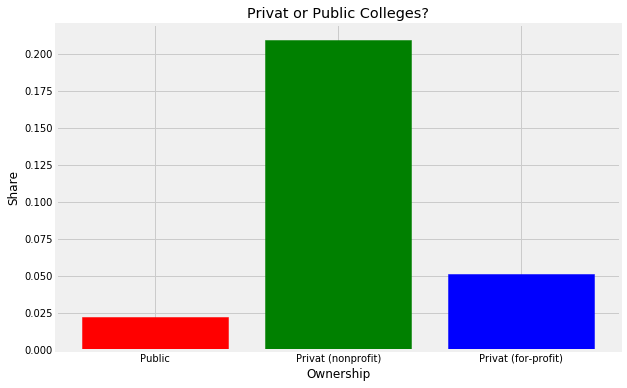

In [136]:
# Make a bar chart
control = ('Public', 'Privat (nonprofit)', 'Privat (for-profit)')
y_pos = np.arange(len(control))
type_control = [(len(final_df[final_df['CONTROL'] == 1])/2489),
                 (len(final_df[final_df['CONTROL'] == 2])/2489),
                 (len(final_df[final_df['CONTROL'] == 3])/2489)]
    
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

barlist = ax.bar(y_pos, type_control, align='center')
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')

plt.xticks(y_pos, control)
plt.xlabel('Ownership')
plt.ylabel('Share')
plt.title('Privat or Public Colleges?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show()

In [ ]:
# the bar chart above can not be used

In [144]:
56+522+129

707

In [ ]:
# the bar char only contain 707 out of 2489 colleges in our final_df